# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Lavie Lederman| laviel@campus.technion.ac.il| 319046504|
|Barry Shafran| barryshafran@campus.technion.ac.il| 206492910|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Masking in Transformers](#-Question-1---Masking-in-Transformers)
    * [Q2 - Preventing Variance Explosion](#-Question-2---Preventing-Variance-Explosion)
    * [Q3 - Recurrent Neural Networks](#-Question-3---Recurrent-Neural-Networks)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Masking in Transformers
---
We examine the classic encoder-decoder transformer model for next-token prediction, and focus on its masking mechanism.

1. Draw a picture of the encoder-decoder transformer model, and qualitatively explain all its parts.
2. Why do we need "Masked self-attention" in the decoder, instead of the regular self attention? Give an example with a specific task.
3. To implement Multi-Head Masked Self-Attention (MHMSA) in the decoder we use
   $$\forall i\in\{1,\ldots,H\}:\ Q_i=XW_i^Q,K_i=XW_i^K, V_i=XW_i^V$$
   $$\mathrm{MHMSA}(X)=\sum_{i=1}^H \mathrm{Softmax}\left (\frac{Q_i K_i^T}{\sqrt{d}}+M\right )V_i W_i^O$$
   Explain how should we choose $M ∈ R^{T× T}$ to implement masking based on the expression for MHMSA above, and why this works.
   
4. Why do we not require masking in the Multi-Head Self-Attention (MHSA) right after the MHMSA? Base your answer on the mathematical expression for the MHSA.
5. Explain the difference in operation of the MHMSA in training and inference. Which method is faster (assuming modern GPU hardware)?
6. A researcher though it might be useful if (similarly to vision models) we add a "max-pooling" layer with pooling size 2 on the token dimension at the end of the first decoder blocks (after the fully connected layers), to reduce its size from $T$ to $T/2$, and then extend it back to the original $T$ (e.g., by replicating the tokens) before the last decoder block. Explain why is this problematic (hint: it is related to the reason we need masking), and how to fix the issue above, allowing this max-pooling layer to be added.

Answer 1 - part 1
---
### <img src="https://www.researchgate.net/publication/363756886/figure/fig3/AS:11431281086057421@1664065203494/The-transformer-encoder-decoder-model.jpg" style="height:50px;display:inline">
**Encoder** - Embeds the inputs and adds positional encodeing.

Than computes self attention and uses normanliztion.

Feed forward - takes all infromation and proceses it

The output is a sequence of contextualized embeddings – one per token – which summarize the input.

**Decoder** - The decoder begins by taking the output embeddings (usually shifted right during training) and adds positional encodings to retain sequence order.

It first applies masked self-attention, allowing each position to attend only to earlier positions to prevent information leakage.

Then, it performs encoder-decoder attention, where the queries come from the decoder and the keys and values come from the encoder’s output—this allows the decoder to align with the input context.

Finally, it passes the result through a feed-forward network, identical in structure to the encoder’s, followed by normalization and residual connections.

Part 2
---
During training, we use masked self attention to prevent the decoder to look on future tookens. This is why we shift the tokens.


example:

Suppose we're translating from French to English:

**Input**: “Je suis étudiant”

**Target**: “I am a student”

At step 2 we want the model to predict am if it has I. without masking it would see "student" beforehand.

Part 3
---
We will define M as
$
M_{ij} =
\begin{cases}
0 & \text{if } j \leq i \\
-\infty & \text{if } j > i
\end{cases}
$

In this way when we have a future token $(j>i)$ the probability will be zero O
(due to softmax), and in other cases it will behave as a normal softmax, allowing attention to the current and previous tokens only.
Part 4
---
We do not require mask after the MHMSA because the encoder proccesses the whole input simulataniosly.

As we can see in the equation below - there is no M:

   $$\mathrm{MHSA}(X)=\sum_{i=1}^H \mathrm{Softmax}\left (\frac{Q_i K_i^T}{\sqrt{d}}\right )V_i W_i^O$$

Part 5
---
During inference - we can't use full matrix operaation because future tokens don't exist yet! The decoding is sequential. It's much slower due to parallelization at all times which can be done at training.

Part 6
---
If we use max-pooling as  suggested we can take token at time $t$ and $t+1$ and pool them together, thus allowing access to future tokens!

We can use causal max pooling as a fix and mix tokens with only previous ones at each time.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$.

Answer 2
---

$F_l(u_l) = W_l \cdot \text{ReLU}(u_l) + b_l$
$$
\mathbb{E}[F_l(u_l)] = \mathbb{E}[W_l] \cdot \text{ReLU}(u_l) + \mathbb{E}[b_l]
$$
We need:

$\mathbb{E}[F_l(u_l)] = 0$
$$
\mathbb{E}[W_l] = 0, \quad \mathbb{E}[b_l] = 0
$$
Will work! We will take EW=Eb=0 and add small noise (variance).

Lets check for the var, for all i

$$
u_l = u_{l-1} + F_{l-1}(u_{l-1}), \quad F_{l-1}(u_{l-1}) = W_{l-1} \cdot \phi(u_{l-1}) + b_{l-1}
$$

$$
\text{Var}(u_l[i]) = \mathbb{E}[\text{Var}(F_{l-1}(u_{l-1}[i]) \mid u_{l-1})] + \text{Var}(u_{l-1}[i])
$$

And thus:

$$
\text{Var}(u_l[i]) \approx \text{Var}(u_{l-1}[i]) = 1
$$ for all i



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Recurrent Neural Networks
---
You are given a recurrent/feedback neural network with LReLU activations $\phi(u) = \max[pu,u]$, with input $x_t$ and a representation $v_t \in \mathbb{R}^d$ that is updated as follows:
$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(u_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau},$$
from initialization $v_0$, and outputs $\hat{y}_t=Cv_t$. The network is trained with GD on a single long series $\{x_{\tau}, y_{\tau}\}_{\tau=1}^t$ with a cost function $\ell(y_t, \hat{y}_t)$ over the last term in the series.

1. Calculate the exact gradient $\frac{\partial \ell}{\partial W[i,j]}$ using Backpropagation through time (BPTT).
2. Recall that calculating the gradient using the method in the previous section there are two issues for $t \to \infty$: (1) the required computational resources grow indefinitely, and (2) the gradients explode or vanish. For each problem: explain it, provide an example for a method to alleviate it and describe any limitations of this method.

Part 1
---
$$
\frac{\partial \ell(y_t, \hat{y}_t)}{\partial W[i,j]} =
\frac{\partial \ell}{\partial \hat{y}_t}
\cdot \frac{\partial \hat{y}_t}{\partial v_t}
\cdot \sum_{t'=1}^{t}
\left(
\prod_{\tau = t'+1}^{t}
\frac{\partial v_\tau}{\partial v_{\tau-1}}
\right)
\cdot \frac{\partial v_{t'}}{\partial u_{t'}[i]} \cdot v_{t'-1}[j]
=
\left[
\frac{\partial \ell}{\partial \hat{y}_t}
\cdot C
\cdot \sum_{t'=1}^{t}
\left(
\prod_{\tau = t'+1}^{t}
\text{Diag}(\phi'(u_\tau)) \cdot W
\right)
\cdot \text{Diag}(\phi'(u_{t'}))
\right]_{i}
\cdot v_{t'-1}[j]
$$

and in other way:
defining

$$
\bar{v}_t = C^T \cdot \frac{\partial \ell}{\partial \hat{y}_t}
$$


$$
\bar{v}_{\tau - 1} = W^T \cdot \text{Diag}(\phi'(u_\tau)) \cdot \bar{v}_\tau
$$

$$
\frac{\partial \ell(y_t, \hat{y}_t)}{\partial W} =
\sum_{t'=1}^t \text{Diag}(\phi'(u_{t'})) \cdot \bar{v}_{t'} \cdot v_{t'-1}^T
$$

Part 2
---
In forward pass we need to store the values of $\bar{v}_t, v_t,u_t$ which is hard for big ts. Can be fixed by going only number of steps back each time (fixed number)  **Truncated Backpropagation Through Time (TBPTT)** . This reduces computational resources but sacrifices accuracy.

The second problem can be solves with gradient-clipping or using gating mecanismes as GRU and LSTM

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [ ]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment
# or `!pip install torchdata` on colab.
!pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
!pip install portalocker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install torch==2.2.0 torchtext==0.17.0 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.2.0+cu121, torchtext: 0.17.0+cpu


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [ ]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [ ]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [ ]:
with open("data/wiki.train.tokens", encoding="utf-8") as f:
    train_iter = [line.strip() for line in f if line.strip() and not line.startswith('=')]
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [ ]:
def load_wikitext_split(path):
    with open(path, encoding="utf-8") as f:
        return [line.strip() for line in f if line.strip() and not line.startswith('=')]

# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again

train_iter = load_wikitext_split("data/wiki.train.tokens")
val_iter   = load_wikitext_split("data/wiki.valid.tokens")
test_iter  = load_wikitext_split("data/wiki.test.tokens")
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(len(train_data), len(val_data), len(test_data))

2049990 214417 241859


In [ ]:
batch_size = 20
eval_batch_size = 10

In [ ]:
"""
Your Code Here
"""
train_data_b = batchify(train_data,batch_size)
val_data_b = batchify(val_data,eval_batch_size)
test_data_b = batchify(test_data,eval_batch_size)

print(train_data_b.shape)
print(val_data_b.shape)
print(test_data_b.shape)

# Each of the tensor's size is the len/batch_size
#[ 2049990/1= =102499, 20 batches]


torch.Size([102499, 20])
torch.Size([21441, 10])
torch.Size([24185, 10])


In [ ]:
itos = vocab.vocab.get_itos()
first_sample_tokens = train_data_b[:, 0][:20] # Take the first column (sample) and first 20 rows (tokens)
first_sample_words = [itos[token] for token in first_sample_tokens]
print(first_sample_words)

['=', 'valkyria', 'chronicles', 'iii', '=', 'senjō', 'no', 'valkyria', '3', '<unk>', 'chronicles', '(', 'japanese', '戦場のヴァルキュリア3', ',', 'lit', '.', 'valkyria', 'of', 'the']


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [ ]:
def get_batch(source, i, bptt):
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int
        bptt: int
    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i + 1:i + 1 + seq_len].reshape(-1)
    return data, target

sample_bptt = 5
sample_batch = get_batch(train_data, 0, sample_bptt)
sample_data = ''
sample_target = ''
print(f'Using bptt = {sample_bptt} and batch size = {batch_size}')
print(f'Data Shape: {sample_batch[0].shape}')
print(f'Target Shape: {sample_batch[1].shape}')

for i in range(sample_bptt):
    sample_data_code = sample_batch[0][i]
    sample_target_code = sample_batch[1][i]
    sample_data += f'{itos[sample_data_code]} '
    sample_target += f'{itos[sample_target_code]} '
print(f'Data is [ {sample_data}]')
print(f'Target is [ {sample_target}]')

Using bptt = 5 and batch size = 20
Data Shape: torch.Size([5])
Target Shape: torch.Size([5])
Data is [ = valkyria chronicles iii = ]
Target is [ valkyria chronicles iii = senjō ]


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [ ]:
ntokens = len(vocab)

# Hyperparameters
emsize = 240  # embedding dimension
d_hid = 250  # dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 3  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 3 # number of attention heads
dropout = 0.3  # dropout probability
lr = 0.01  # learning rate
norm_first = False # post or pre layer normalization

# Model initialization
model = TransformerModel(ntokens, emsize, nhead, d_hid, nlayers, dropout, norm_first).to(device)
pad_idx = vocab['<pad>']
# Loss and Optimizer
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)


print(f'Number of tokens: {ntokens}')
print('Chosen Hyperparameters:')
print(f'  Embedding size: {emsize}')
print(f'  Number of hidden units: {d_hid}')
print(f'  Number of layers: {nlayers}')
print(f'  Number of attention heads: {nhead}')
print(f'  Dropout: {dropout}')
print(f'  Loss criterion: {criterion}')
print(f'  Optimizer: {optimizer.__class__.__name__}')
print(f'  Learning rate: {lr}')
print(f'  Learning Scheduler: {scheduler.__class__.__name__}')
print(f'  Transformer LayerNormalization: {"pre" if norm_first else "post"}')

print('\nModel Architecture:')
model

Number of tokens: 25703
Chosen Hyperparameters:
  Embedding size: 240
  Number of hidden units: 250
  Number of layers: 3
  Number of attention heads: 3
  Dropout: 0.3
  Loss criterion: CrossEntropyLoss()
  Optimizer: SGD
  Learning rate: 0.01
  Learning Scheduler: StepLR
  Transformer LayerNormalization: post

Model Architecture:


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=240, out_features=240, bias=True)
        )
        (linear1): Linear(in_features=240, out_features=250, bias=True)
        (dropout): Dropout(p=0.3, inplace=False)
        (linear2): Linear(in_features=250, out_features=240, bias=True)
        (norm1): LayerNorm((240,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((240,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.3, inplace=False)
        (dropout2): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (encoder): Embedding(25703, 240)
  (decoder): Linear(in_features=240, out_features=25703, bias=True)
)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def evaluate(model, eval_data):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [ ]:
def train(model, bptt):
    model.train()  # turn on train mode
    total_loss = 0.     # total over the entire epoch
    log_loss = 0.       # loss just for logging interval
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data_b) // bptt
    for batch, i in enumerate(range(0, train_data_b.size(0) - 1, bptt)):
        data, targets = get_batch(train_data_b, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:
            src_mask = model.generate_square_subsequent_mask(seq_len).to(device)

        output = model(data, src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_loss += loss.item()

        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = log_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            log_loss = 0
            start_time = time.time()

    return total_loss / num_batches


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda


| epoch   1 |   200/ 2928 batches | lr 0.01 | ms/batch 16.26 | loss  9.92 | ppl 20334.83
| epoch   1 |   400/ 2928 batches | lr 0.01 | ms/batch 15.58 | loss  8.73 | ppl  6202.82
| epoch   1 |   600/ 2928 batches | lr 0.01 | ms/batch 15.78 | loss  8.29 | ppl  3974.58
| epoch   1 |   800/ 2928 batches | lr 0.01 | ms/batch 16.22 | loss  8.10 | ppl  3292.52
| epoch   1 |  1000/ 2928 batches | lr 0.01 | ms/batch 16.08 | loss  7.93 | ppl  2778.70
| epoch   1 |  1200/ 2928 batches | lr 0.01 | ms/batch 15.83 | loss  7.85 | ppl  2561.62
| epoch   1 |  1400/ 2928 batches | lr 0.01 | ms/batch 16.02 | loss  7.76 | ppl  2333.93
| epoch   1 |  1600/ 2928 batches | lr 0.01 | ms/batch 16.56 | loss  7.70 | ppl  2215.15
| epoch   1 |  1800/ 2928 batches | lr 0.01 | ms/batch 16.23 | loss  7.68 | ppl  2154.12
| epoch   1 |  2000/ 2928 batches | lr 0.01 | ms/batch 16.12 | loss  7.65 | ppl  2098.23
| epoch   1 |  2200/ 2928 batches | lr 0.01 | ms/batch 16.08 | loss  7.53 | ppl  1868.58
| epoch   1 |  2400/ 

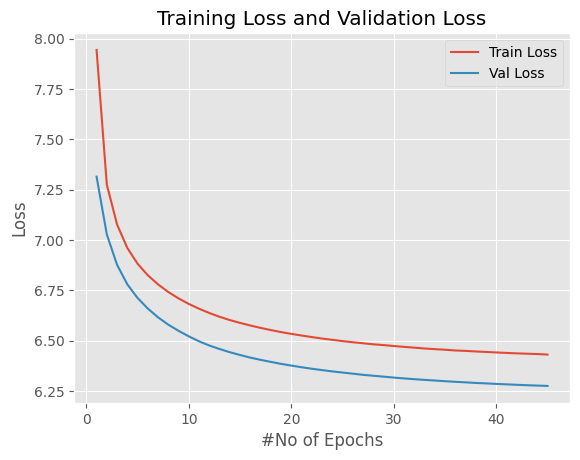

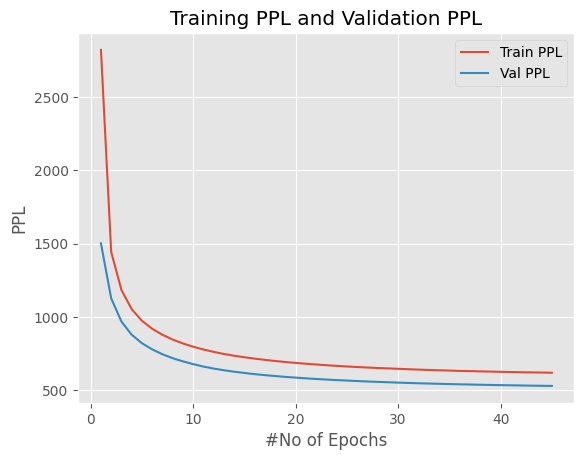

In [ ]:
"""
Your Code Here
"""
best_val_loss = float("inf")
epochs = 45
best_model = None
bptt = 35
train_loss_per_epoch = []
val_loss_per_epoch = []

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    epoch_loss = train(model, bptt=35)

    val_loss = evaluate(model, val_data_b)
    train_loss_per_epoch.append(epoch_loss)
    val_loss_per_epoch.append(val_loss)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    scheduler.step()
x_axis = list(range(1, epochs + 1))
plt.figure()
plt.plot(x_axis, train_loss_per_epoch, label='Train Loss')
plt.plot(x_axis, val_loss_per_epoch, label='Val Loss')
plt.ylabel('Loss')
plt.xlabel("#No of Epochs")
plt.title('Training Loss and Validation Loss')
plt.legend(loc='upper right')
plt.show()
plt.style.use("ggplot")
plt.figure()
plt.plot(x_axis, np.exp(train_loss_per_epoch), label='Train PPL')
plt.plot(x_axis, np.exp(val_loss_per_epoch), label='Val PPL')
plt.ylabel('PPL')
plt.xlabel("#No of Epochs")
plt.title('Training PPL and Validation PPL')
plt.legend(loc='upper right')
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [ ]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [ ]:
num_sentences = 3
for i in range(num_sentences):
    sentence = generate(model, vocab, nwords=20)
    sentence_str = ' '
    print(sentence_str.join(sentence))

. the allah included is black topical zealand howson of the lake has been moving to the samantha is back
, the ciara so it was as not prussia by the due to proposed of the original san day .
. the missouri combat removed ' s world expressed of a endgames speculations part . . the mm surrogate by


The ouput has some structural logic and attention between adjacent words but fails to generate real human-like sentences. After training the model for some epochs we saw the output is making more sense but reaches it's limit very quickly.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/

In [ ]:
# Trying to find a compatible torchtext version for torch 2.6.0
# Based on torchtext documentation and release notes, torchtext 0.18.0 should be compatible with torch 2.3.0 and above.
# However, the error suggests a mismatch. Let's try downgrading torchtext to a slightly older version that might work with torch 2.6.0.
# torchtext 0.17.0 was released around the same time as torch 2.2.0, which might be closer to 2.6.0 in terms of JIT symbols.
# Let's try installing torchtext 0.17.0 without dependencies to avoid upgrading torch.
